In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
import math

from utils import *

%matplotlib notebook

<IPython.core.display.Javascript object>


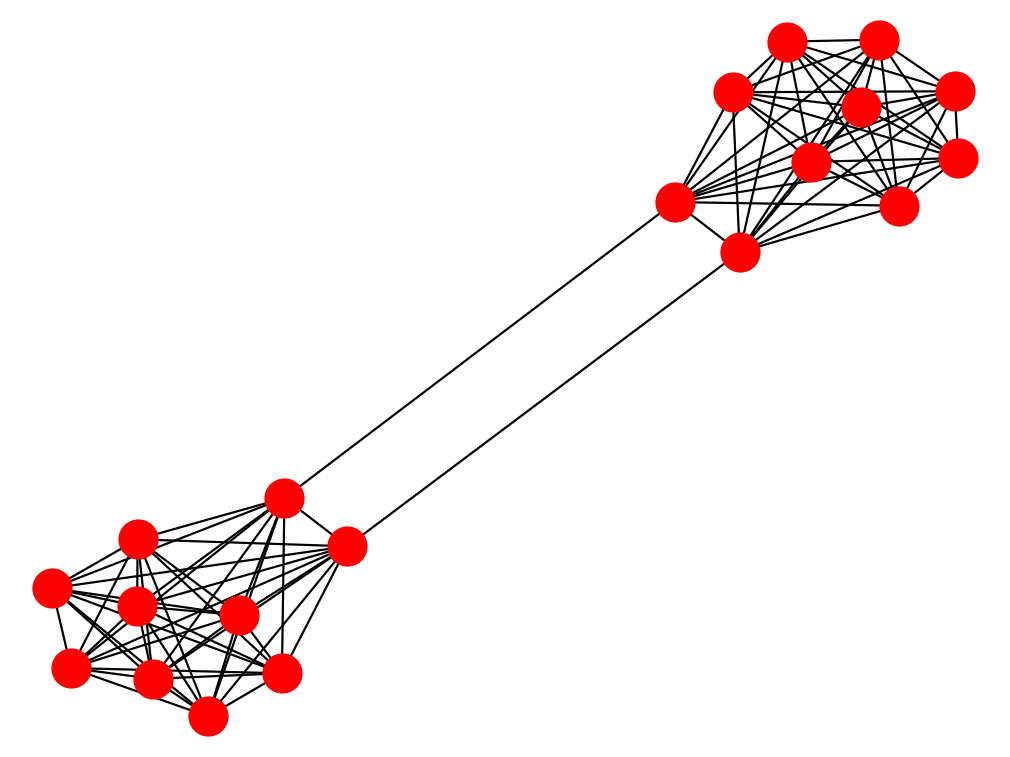

In [2]:
%matplotlib notebook
G = nx.newman_watts_strogatz_graph(20, 2, 0.5)
G=Modules_full(2,10,2)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(G, pos = pos)

In [3]:
B, v, w = compute_eig_projection(G)

<IPython.core.display.Javascript object>


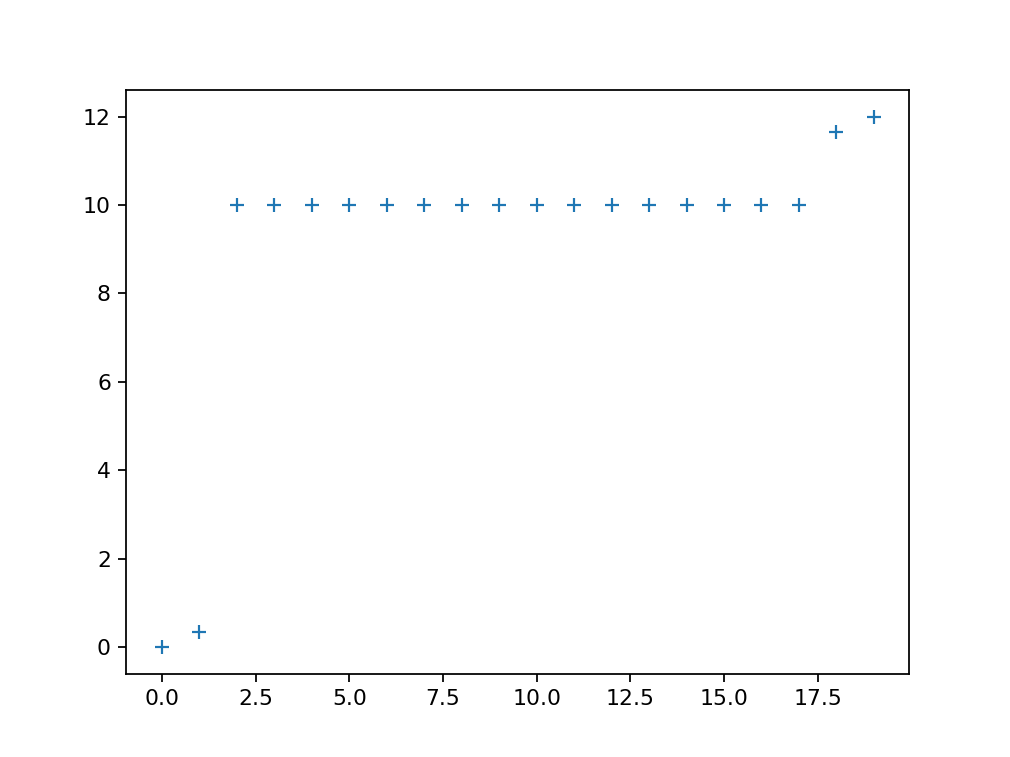

In [4]:


plt.figure()
plt.plot(w,'+')


<IPython.core.display.Javascript object>


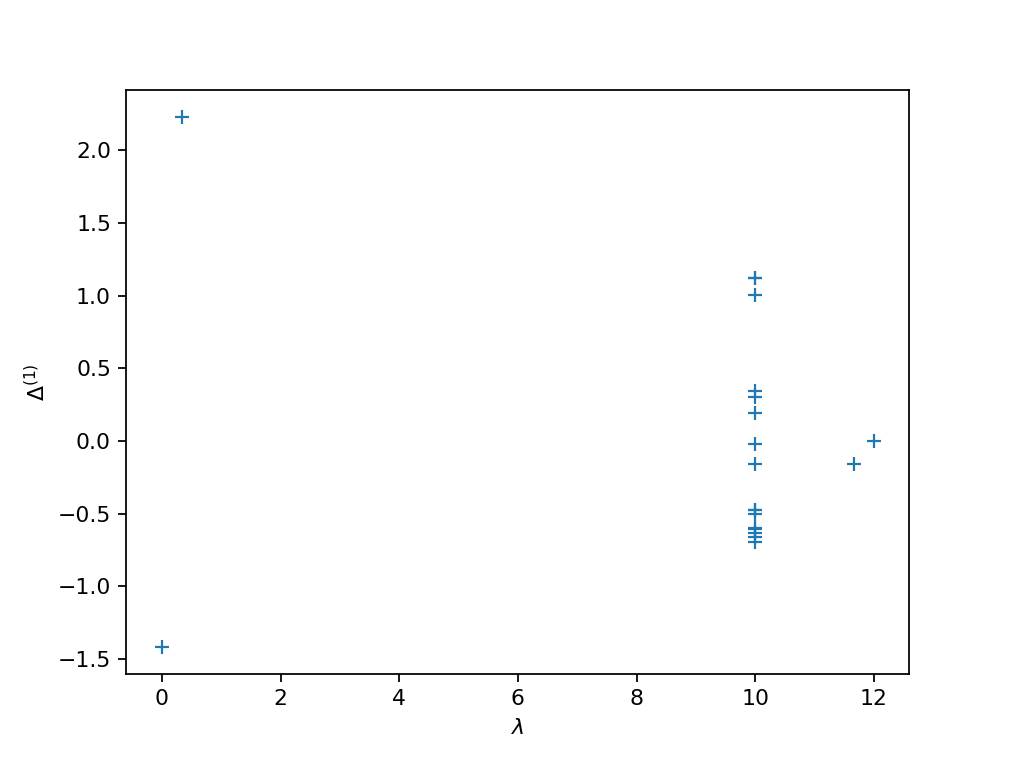

<IPython.core.display.Javascript object>


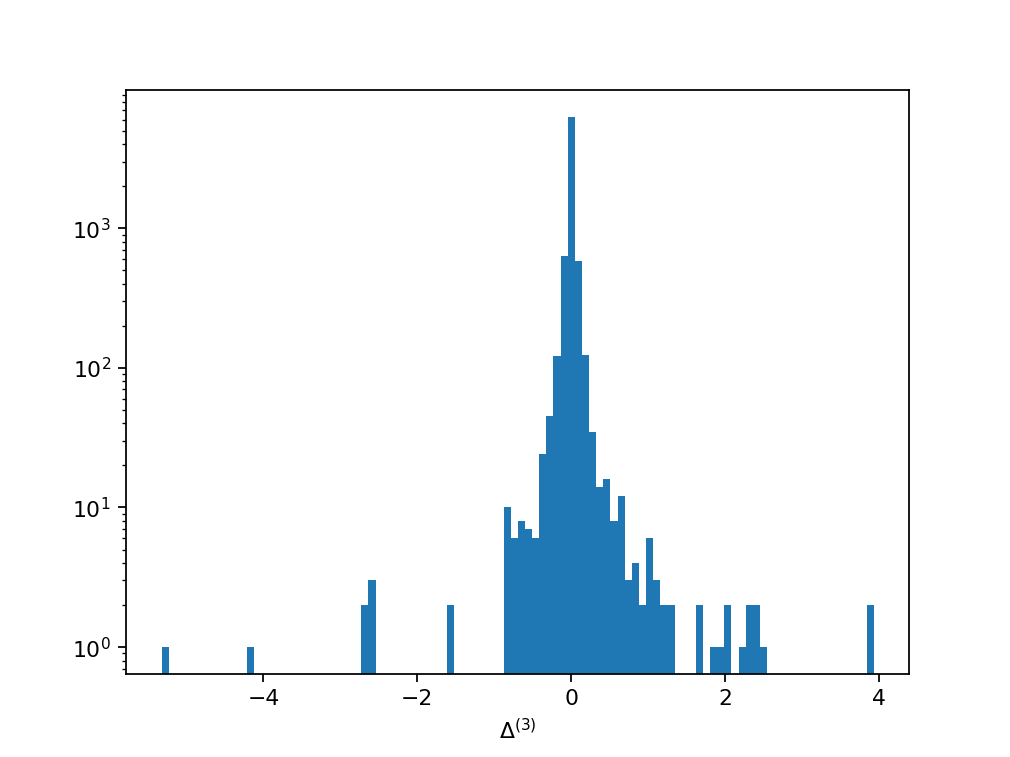

<IPython.core.display.Javascript object>


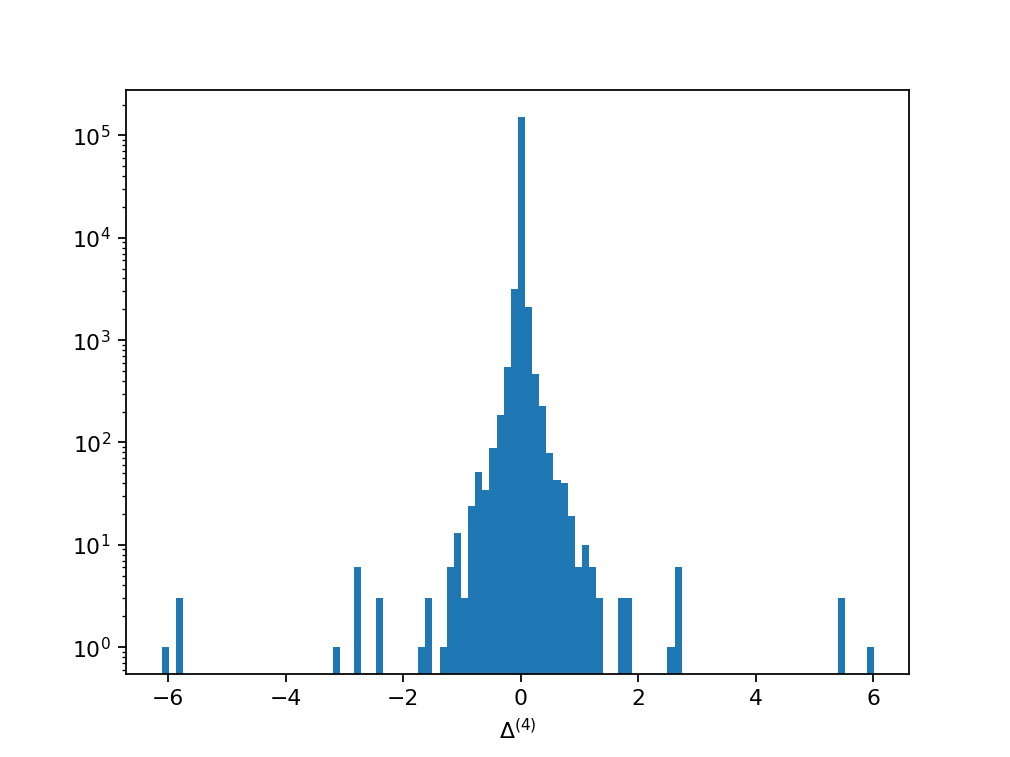

Text(0.5,0,'$\\Delta^{(4)}$')

In [5]:


D1 = Delta_1(B, v, w)

plt.figure()
plt.plot(w, D1,'+')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\Delta^{(1)}$')

D3 = Delta_3(B, v, w)

plt.figure()
plt.hist(D3.flatten(),bins=100,log=True)
plt.xlabel(r'$\Delta^{(3)}$')

D4 = Delta_4(B, v, w)

plt.figure()
plt.hist(D4.flatten(),bins=100,log=True)
plt.xlabel(r'$\Delta^{(4)}$')


In [8]:
#initial conditions

theta_0 = .1*np.random.rand(len(G))
omega_0=np.ones(B.shape[1])*0
# theta_0 = np.random.uniform(0,2*math.pi,(len(G)))
gamma_0 = theta_0.dot(v)

degree=np.absolute(B).sum(0)
a=1

t_max = 10 #integration time
n_t = 200 #number of timepoints 

result_theta = integrate_kuramoto_full_theta(B, theta_0, t_max, n_t,a,omega_0,degree)
result_gamma = integrate_kuramoto_full_gamma(B, v, gamma_0, t_max, n_t,a,omega_0,degree)


<IPython.core.display.Javascript object>


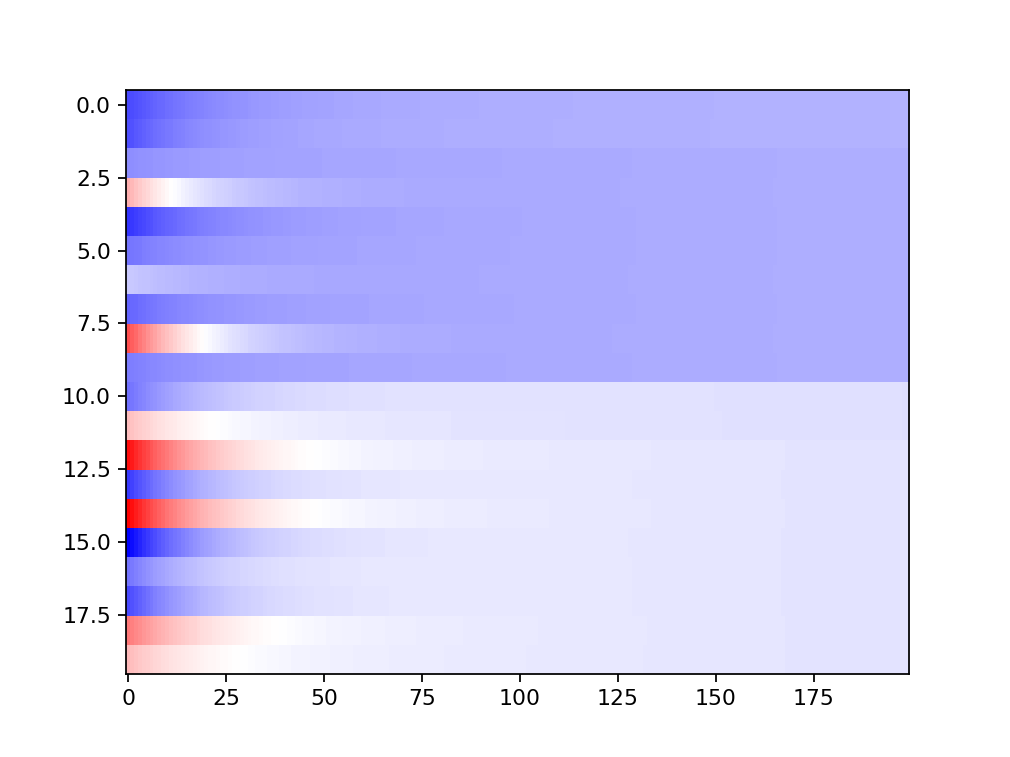

<IPython.core.display.Javascript object>


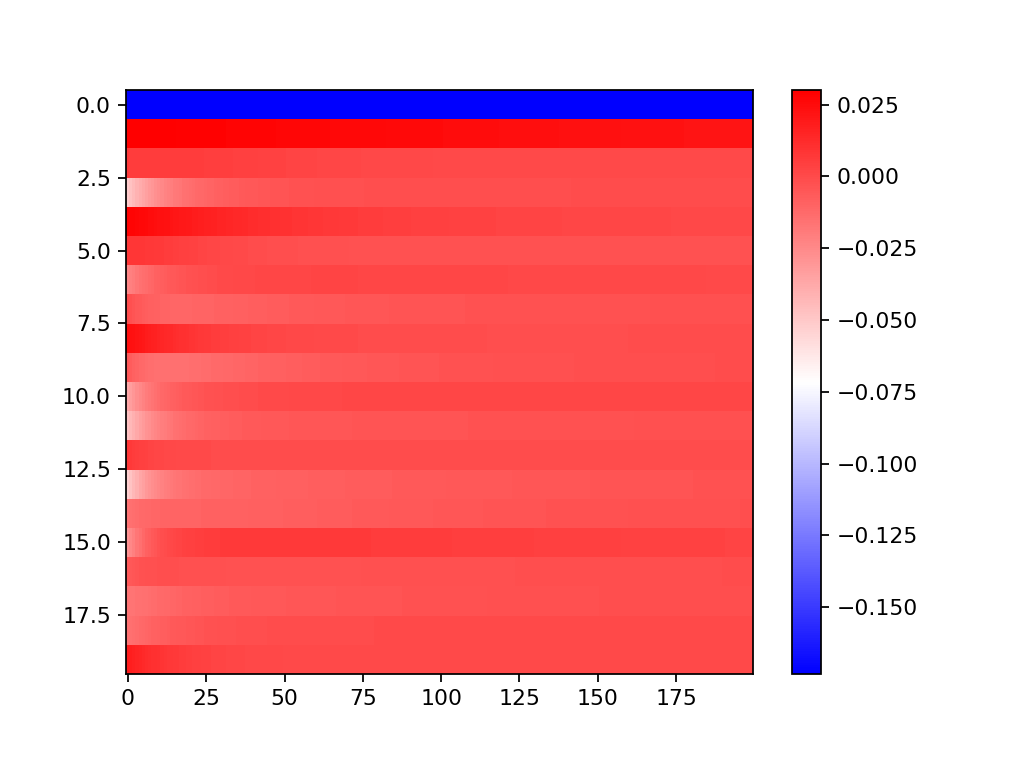

In [9]:
times = result_theta.t
theta = result_theta.y
gamma = result_gamma.y


plt.figure()
plt.imshow(theta, aspect='auto',cmap='bwr')

plt.figure()
plt.imshow(gamma, aspect='auto',cmap='bwr')
plt.colorbar()

<IPython.core.display.Javascript object>


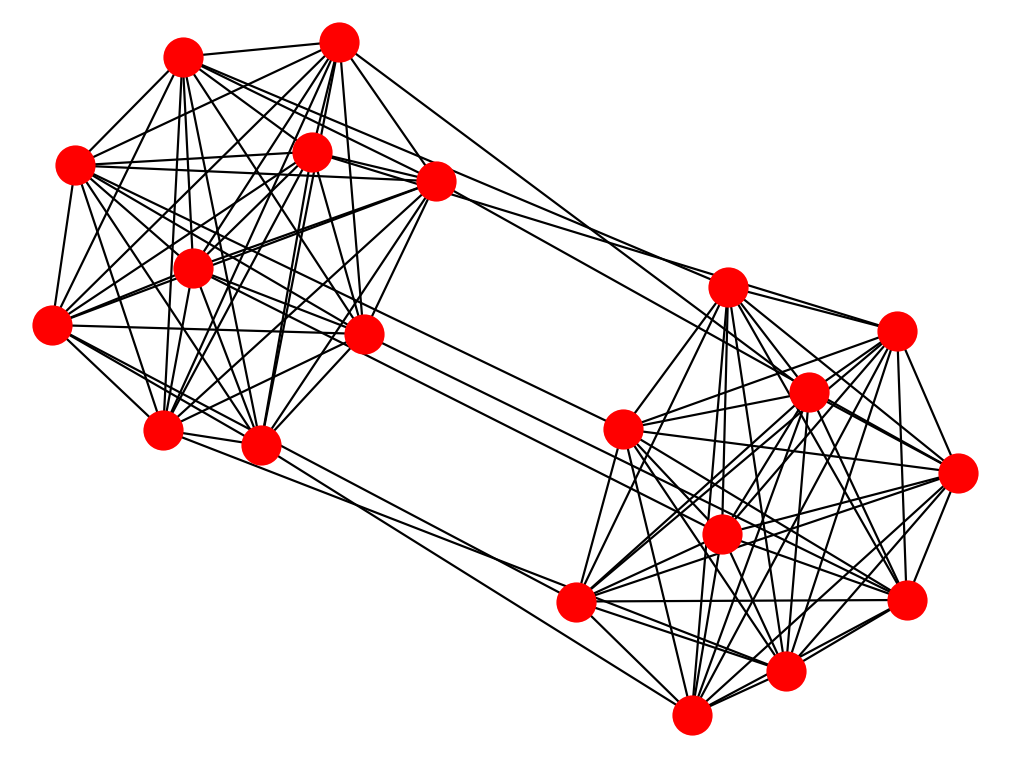

<IPython.core.display.Javascript object>


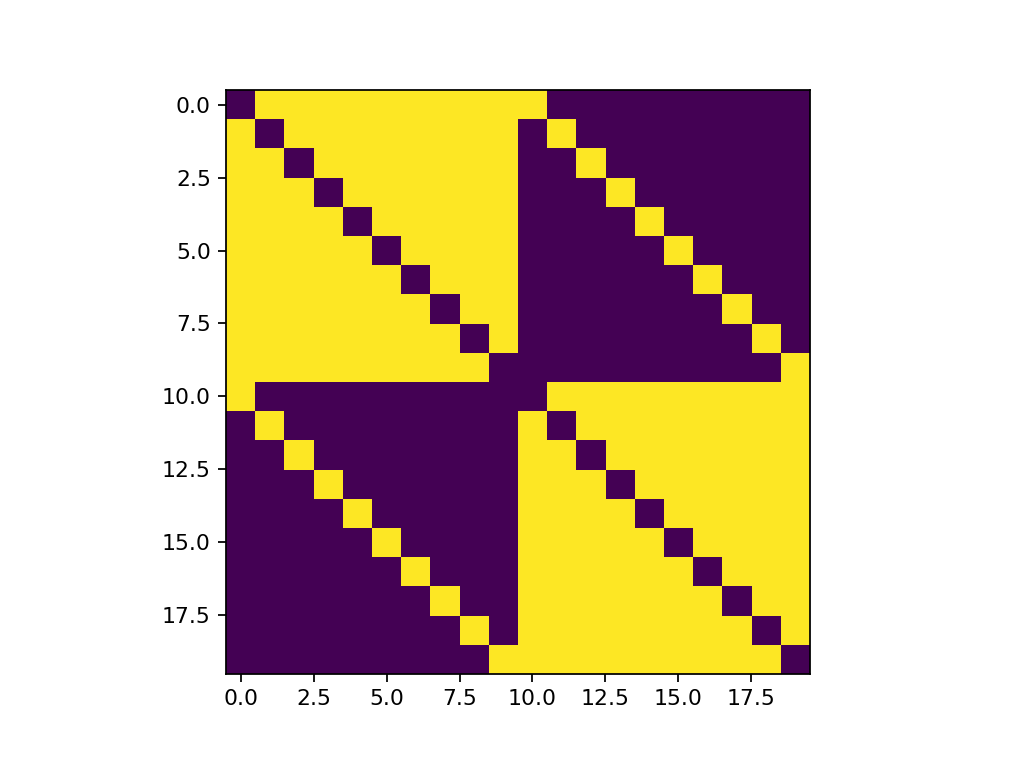

In [10]:
# example with modular graph and alpha

Nc=2
Nn=10

G=Modules_full(Nc,Nn,Nn)
B,v,w=compute_eig_projection(G)

pos = nx.spring_layout(G)
plt.figure()
nx.draw(G, pos = pos)

A=np.asarray(nx.to_numpy_matrix(G))
degree=A.sum(0)
plt.figure()
plt.imshow(A)

In [11]:
theta_0=np.random.uniform(0,2*math.pi,(B.shape[1]))
omega_0=np.ones(B.shape[1])*0
degree=np.absolute(B).sum(0)
a=1
alpha=0

t_max=20
n_t=1001

sol_alt=integrate_kuramoto_full_theta_alpha(B, theta_0, t_max, n_t,alpha,a,omega_0,degree)
sol_alt.y=np.mod(sol_alt.y,2*math.pi)

<IPython.core.display.Javascript object>


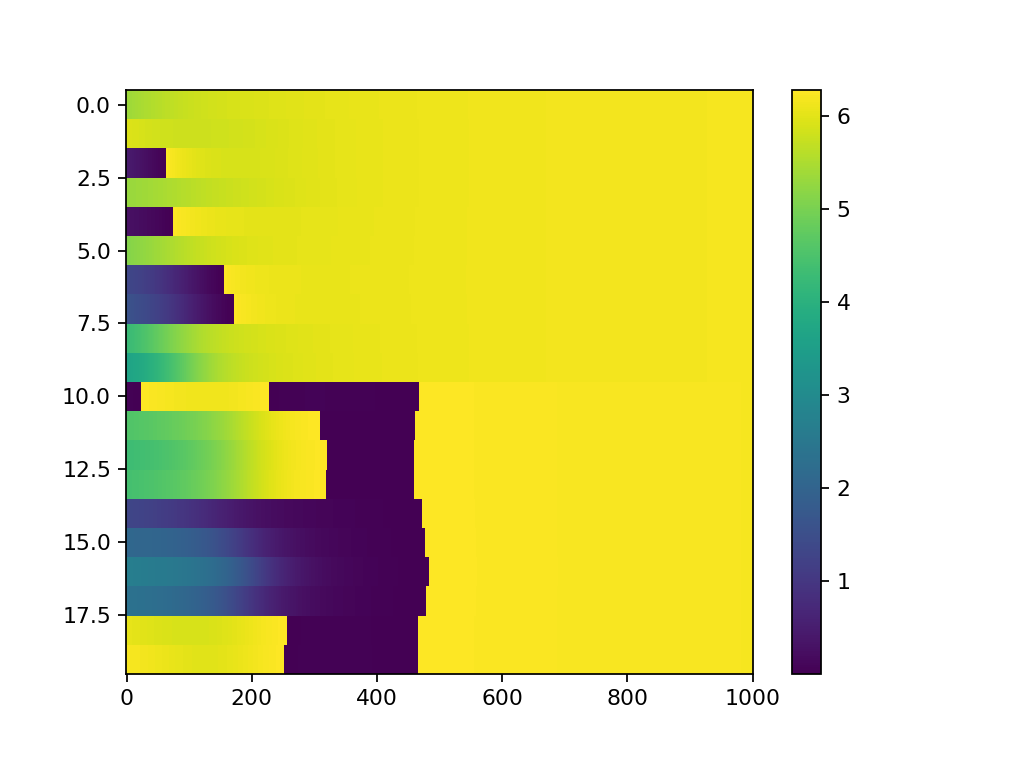

In [12]:
plt.figure()
plt.imshow(sol_alt.y,aspect='auto')
plt.colorbar()

<IPython.core.display.Javascript object>


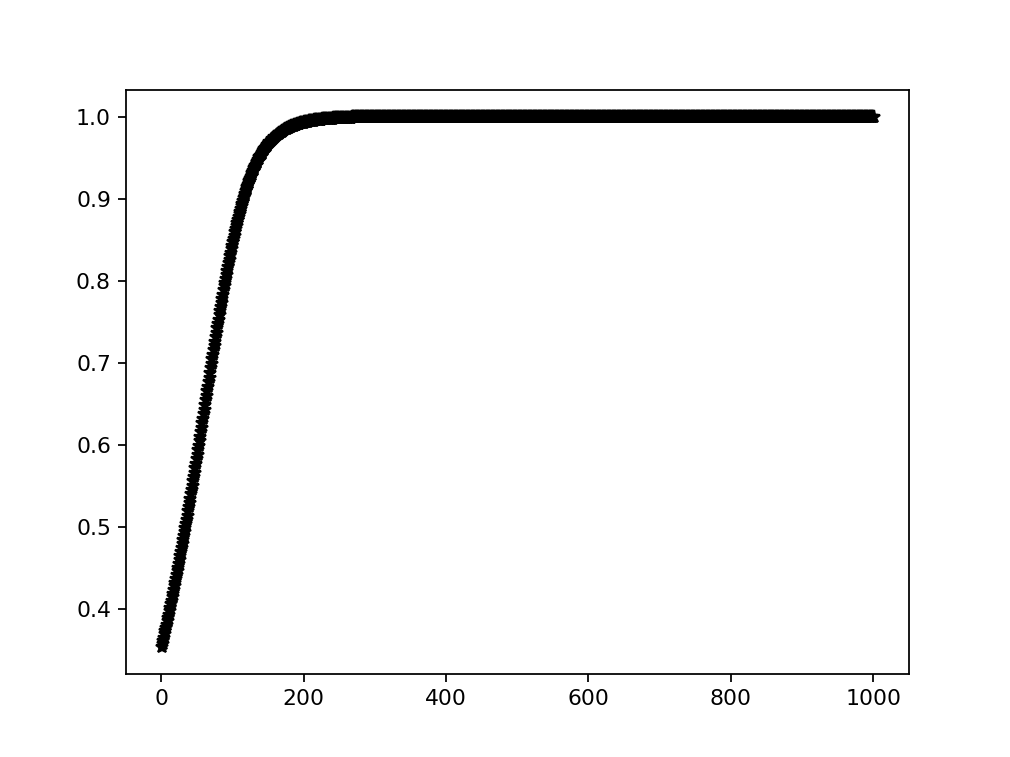

In [13]:
op=order_parameter(sol_alt.y,Nc,Nn)
op.shape
plt.figure()
plt.plot(np.linspace(1,n_t,n_t),op[1,:],'k*-')

<IPython.core.display.Javascript object>


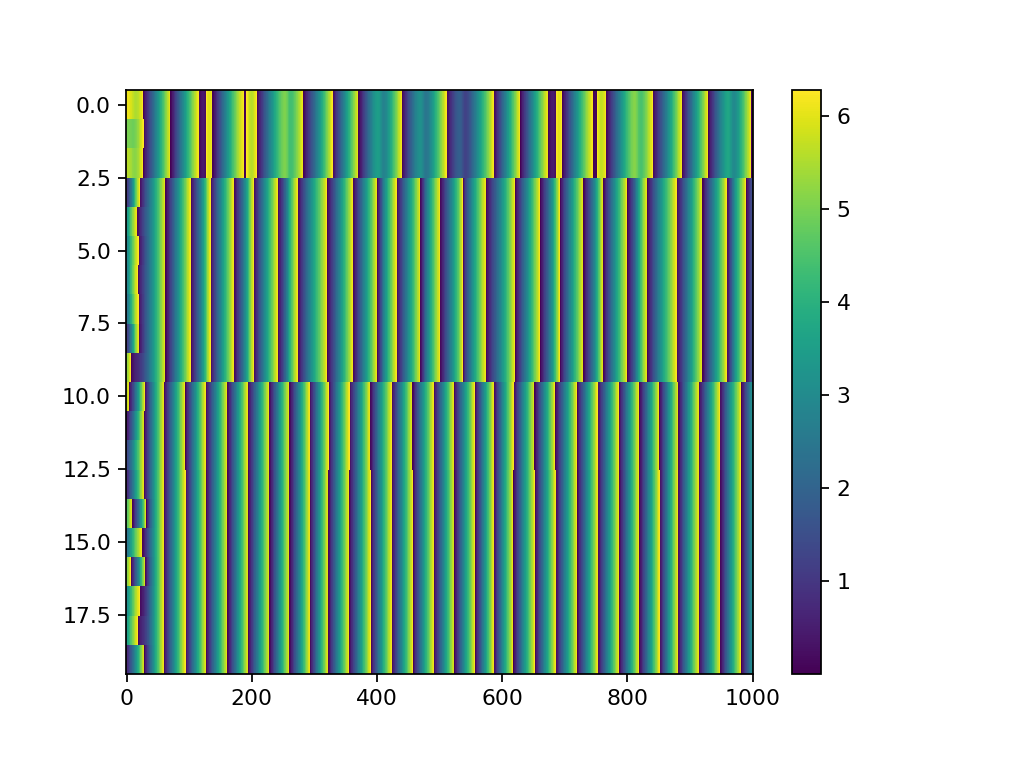

<IPython.core.display.Javascript object>


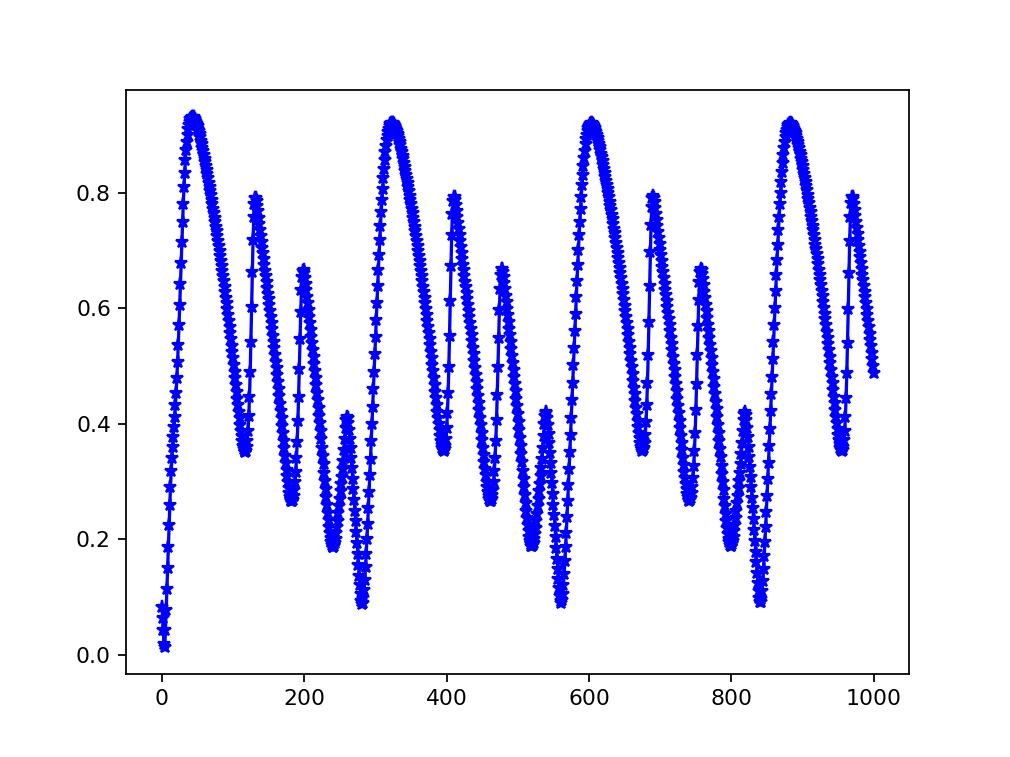

(0.017849795518379633, 0.017062399470317555)


In [14]:
# example with two "driving" nodes
Nc=2
Nn=10
G=Modules_full(Nc,Nn,1*Nn)
B,v,w=compute_eig_projection(G)
degree=np.absolute(B).sum(0)

theta_0=np.random.uniform(0,2*math.pi,(Nc*Nn))
omega_0=np.ones(Nc*Nn)*1
omega_0[0:3]=0
t_max=200
n_t=1001
a=1
alpha=0

sol_full=integrate_kuramoto_full_theta(B, theta_0, t_max, n_t, a, omega_0, degree)
sol_full.y=np.mod(sol_full.y,2*math.pi)

op=order_parameter(sol_full.y,Nc,Nn)
plt.figure()
plt.imshow(sol_full.y,aspect='auto')
plt.colorbar()
plt.figure()
plt.plot(op[0,:],'b*-')

print(Shanahan_indices(op))

In [23]:
# scanning the alpha
Nc=2
Nn=10
G=Modules_full(Nc,Nn,5)
B,v,w=compute_eig_projection(G)
degree=np.absolute(B).sum(0)
a=1

nlag=30
lag=np.linspace(0,0.5,nlag)
nrep=30

t_max = 500
n_t = 5000

l=np.zeros([nlag,nrep])
chi=np.zeros([nlag,nrep])

omega_0=np.ones(Nc*Nn)*0

for i, alpha in enumerate(lag):
    for n in range(nrep):
        theta_0=np.random.uniform(0,2*math.pi,(Nc*Nn))

        sol_full=integrate_kuramoto_full_theta_alpha(B, theta_0, t_max, n_t, alpha, a, omega_0, degree)
        sol_full.y=np.mod(sol_full.y,2*math.pi)
        
        op=order_parameter(sol_full.y,Nc,Nn)
        lt,chit=Shanahan_indices(op)
        
        l[i,n] = lt
        chi[i,n] = chit
    


<IPython.core.display.Javascript object>


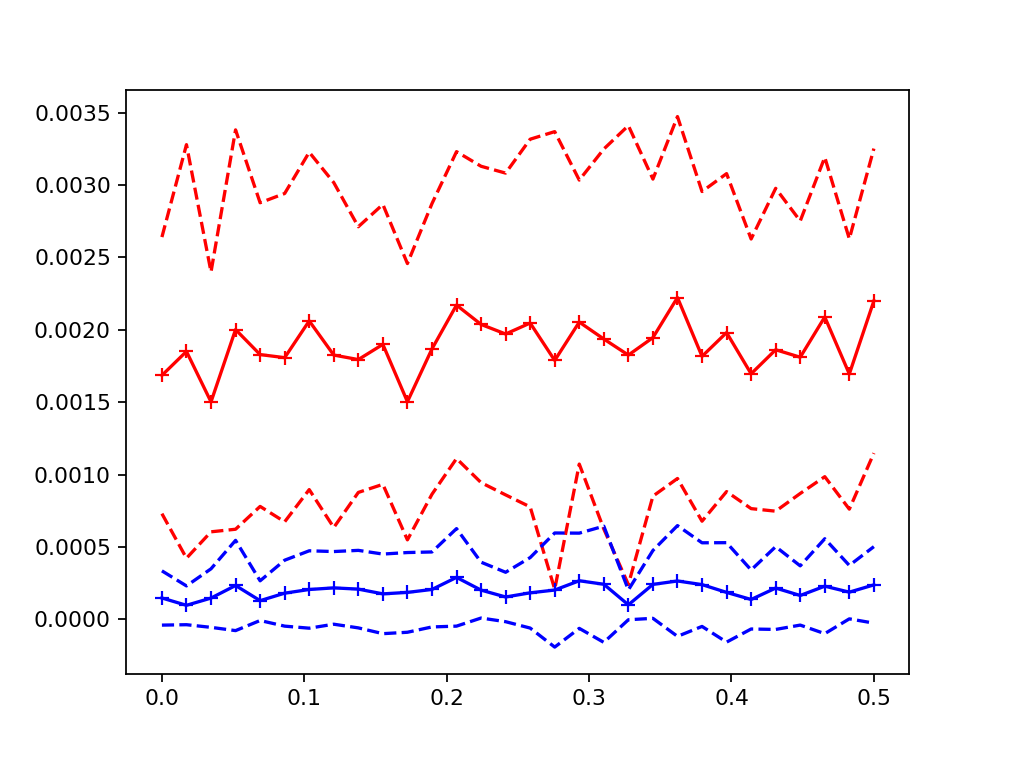

In [24]:
plt.figure()
plt.plot(lag, l.mean(1),'r+-')
plt.plot(lag, l.mean(1)-l.std(1),'r--')
plt.plot(lag, l.mean(1)+l.std(1),'r--')

plt.plot(lag, chi.mean(1),'b+-')
plt.plot(lag, chi.mean(1)+chi.std(1),'b--')
plt.plot(lag, chi.mean(1)-chi.std(1),'b--')